In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import pickle
import random
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
class artStylesDataset(Dataset):
    def __init__(self,data_dir,transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [3]:
class ArtsClassifier(nn.Module):
    def __init__(self, num_classes=6):
        super(ArtsClassifier,self).__init__()
        self.base_model = timm.create_model("efficientnet_b0", pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        
        enet_out_size = 1280
        self.classifier = nn.Linear(enet_out_size,num_classes)
        

    def forward(self,x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [4]:
transform = transforms.Compose([
    transforms.Resize((464,300)),
    transforms.ToTensor(),
])

model_path = "newest_model.pkl"

trainDataset = artStylesDataset("./Data", transform=transform)
validDataset = artStylesDataset("./Valid", transform=transform)

trainLoader = DataLoader(trainDataset,batch_size=16,shuffle=True)
validLoader = DataLoader(validDataset,batch_size=8,shuffle=True)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = ArtsClassifier(num_classes=6)
model.to(device)

try:
    with open(model_path, 'rb') as file:  
        model = pickle.load(file)
except:
    pass

In [6]:
num_epoch = 15
trainLoss,valLoss = [], []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(),lr=0.002)

print("Training session start")
for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0
    for images,labels in tqdm(trainLoader,desc="Training progress"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss/len(trainLoader.dataset)
    trainLoss.append(train_loss)

    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images,labels in tqdm(validLoader,desc="Validation progress"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(validLoader.dataset)
    valLoss.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epoch} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training session start


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/15 - Train loss: 0.5876759805145235, Validation loss: 0.3196311489383403


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/15 - Train loss: 0.27751198675521643, Validation loss: 0.46463698389438485


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/15 - Train loss: 0.1549435278419869, Validation loss: 0.20217393533541606


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/15 - Train loss: 0.08979182398031257, Validation loss: 0.171741134851562


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/15 - Train loss: 0.05605761020677505, Validation loss: 0.21635237371508712


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 6/15 - Train loss: 0.050664893984194645, Validation loss: 0.16400004847046848


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 7/15 - Train loss: 0.02940248939280956, Validation loss: 0.23477271886819764


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 8/15 - Train loss: 0.030651602902590117, Validation loss: 0.05073204334968558


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 9/15 - Train loss: 0.030873402492259117, Validation loss: 0.06947938280108457


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 10/15 - Train loss: 0.01835840560310407, Validation loss: 0.1407283792691697


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 11/15 - Train loss: 0.020467435270050162, Validation loss: 0.153532423969647


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 12/15 - Train loss: 0.012814040975522462, Validation loss: 0.1921608339708585


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 13/15 - Train loss: 0.02251133550432992, Validation loss: 0.08480688471060532


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 14/15 - Train loss: 0.010434312017097262, Validation loss: 0.12039781896007928


Training progress:   0%|          | 0/43 [00:00<?, ?it/s]

Validation progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 15/15 - Train loss: 0.022898715910008163, Validation loss: 0.4272113223488514


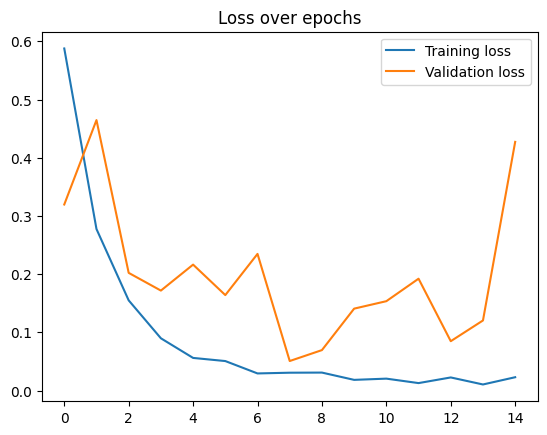

In [7]:
plt.plot(trainLoss, label="Training loss")
plt.plot(valLoss, label="Validation loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()

Saving/Loading Model

In [8]:
with open(model_path, 'wb') as file:  
    pickle.dump(model, file)

Simple model test below

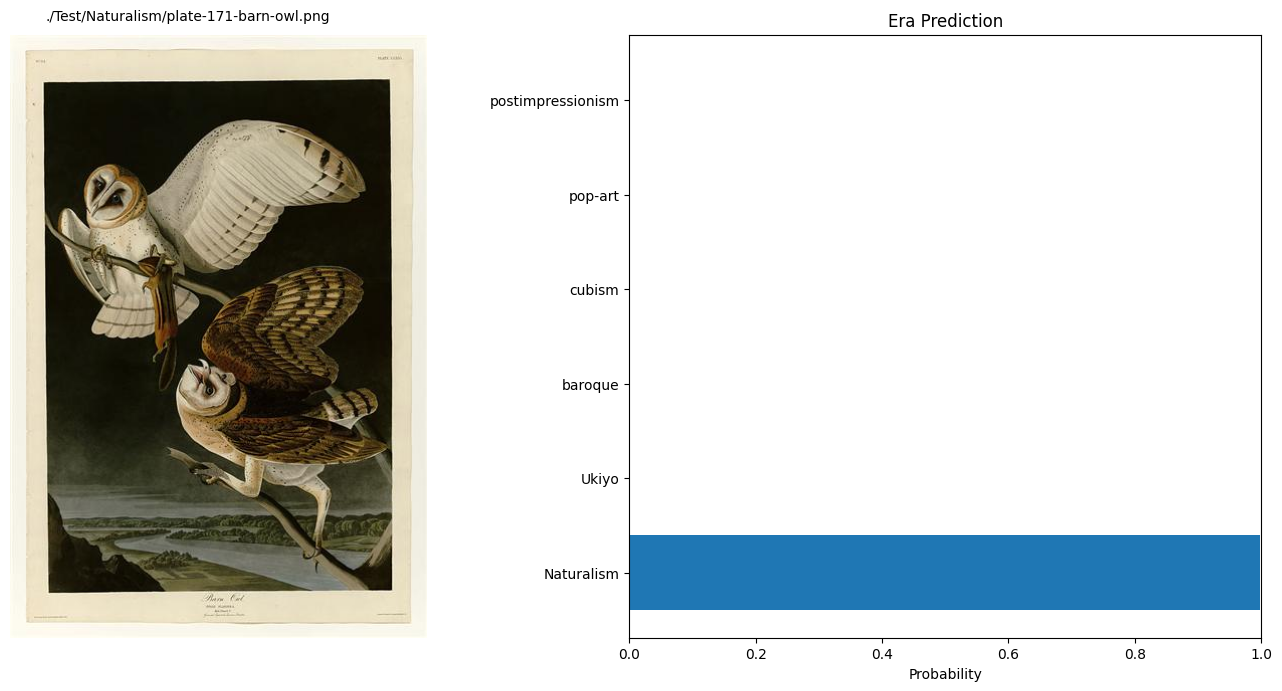

In [15]:
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

def visualize_predictions(original_image, probabilities, class_names, picture_name):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].text(35,-15,picture_name)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Era Prediction")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

image_paths = [
    "./Test/baroque/christ-in-the-storm.png",
    "./Test/baroque/the-anatomy-lesson-of-dr-nicolaes-tulp.png",
    "./Test/pop-art/mickey.png",
    "./Test/pop-art/interior-with-mirrored-wall.png",
    "./Test/postimpressionsm/bibemus-quarry.png",
    "./Test/postimpressionsm/vase-with-peonies.png",
    "./Test/cubism/still-life-in-front-of-a-window-at-saint-raphael.png",
    "./Test/cubism/hobo.png",
    "./Test/Naturalism/plate-162-zenaida-dove.png",
    "./Test/Naturalism/plate-171-barn-owl.png",
    "./Test/Ukiyo/woman-smoking.png",
    "./Test/Ukiyo/women-gathering-for-tooth-blackening-ceremony.png"
]

test_image = random.choice(image_paths)

#Special Case
#test_image = "./Test/cubism/landscape-near-antwerp.png"
#test_image = "./christ-in-the-storm.png"

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = trainDataset.classes 
visualize_predictions(original_image, probabilities, class_names, test_image)

END